___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
ri = pd.read_csv('RI_cleaned.csv',index_col=0)
ri.index=pd.to_datetime(ri.index)


In [2]:
 weather=pd.read_csv('weather.csv')

In [3]:
summary_statistics=weather[['TMIN', 'TAVG', 'TMAX']].describe()
summary_statistics

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


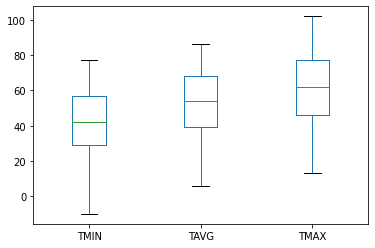

In [3]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box');

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [4]:
weather['TDIFF']=weather.TMAX-weather.TMIN

In [5]:
s=weather.TDIFF.describe()
s

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

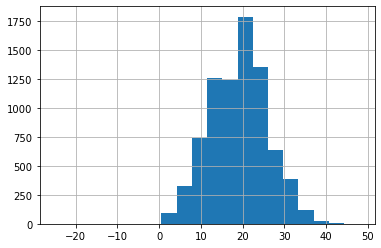

In [6]:
weather['TDIFF'].hist(bins=20);

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [8]:
WT=weather.loc[:,'WT01':'WT22']
WT

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
new=WT.T.apply(lambda x: np.sum(x))
new

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Length: 8022, dtype: float64

In [11]:
weather['bad_conditions']=WT.sum(axis=1)
weather['bad_conditions']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8017    1.0
8018    0.0
8019    3.0
8020    2.0
8021    1.0
Name: bad_conditions, Length: 8022, dtype: float64

In [12]:
weather.sample(5)###random veriyor

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
6604,USW00014765,2012-02-13,8.95,NaN,43.0,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,26.0,1.0
6099,USW00014765,2010-09-26,10.51,NaN,73.0,60.0,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,13.0,4.0
6116,USW00014765,2010-10-13,4.92,NaN,64.0,43.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
2109,USC00379423,2010-10-26,NaN,NaN,68.0,43.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0
4013,USW00014765,2005-01-09,6.04,31.0,34.0,28.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,3.0


In [ ]:
###weather.bad_conditions=weather.bad_conditions.fillna(0).astype(int)

In [7]:
#weather['bad_conditions']=new
#weather.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<AxesSubplot:>

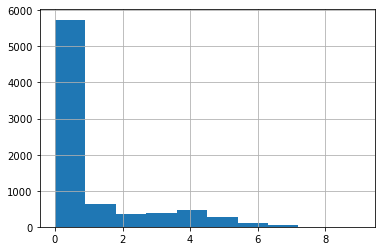

In [10]:
weather['bad_conditions'].hist()

In [13]:
weather['DATE'].nunique()

4017

In [ ]:
weather.bad_conditions.value_counts(dropna=False)

In [14]:
len(weather)

8022

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [13]:
weather.bad_conditions.unique()

array([0., 1., 2., 3., 4., 9., 6., 8., 5., 7.])

In [14]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
 mapping={}
for i in np.arange(0,10):
    if i==0:
        mapping[i]='good'
    elif 1<=i<=4:
        mapping[i]='bad'
    else:
        mapping[i]='worse' 
mapping          

{0: 'good',
 1: 'bad',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 5: 'worse',
 6: 'worse',
 7: 'worse',
 8: 'worse',
 9: 'worse'}

In [19]:
weather['rating']=weather.bad_conditions.map(mapping)
#weather['rating']=weather.bad_conditions.apply(lambda x:mapping[x])
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [21]:
weather.rating.value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [22]:
weather.rating.unique()

array(['good', 'bad', 'worse'], dtype=object)

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [54]:
#################1.method

cats=['good','bad','worse']
weather.rating.astype('category')

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['worse' < 'bad' < 'good']

In [55]:
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)

In [56]:
weather.rating=weather.rating.astype(cat_dtype)

In [57]:
weather.rating.head(5)

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [20]:
###ders 2.method######################
categ=['good','bad','worse']
weather.rating=pd.Categorical(weather.rating,categories=categ,ordered=True)


In [21]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [22]:
#import pandas as pd
ri = pd.read_csv('police.csv', nrows=50000)
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
#ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)
ri.set_index('stop_datetime', inplace=True)

In [23]:
ri.reset_index(inplace=True)
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [28]:
weather.columns


Index(['STATION', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22',
       'bad_conditions', 'rating'],
      dtype='object')

In [24]:
weather_rating=weather[['DATE','rating']]

In [25]:
weather_rating.value_counts()

DATE        rating
2013-05-10  good      2
2013-05-11  good      2
2008-01-06  good      2
2013-05-16  good      2
2013-05-15  good      2
                     ..
2009-01-11  worse     1
            good      1
2009-01-10  worse     1
            good      1
2015-12-31  bad       1
Length: 6268, dtype: int64

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [26]:
######Ders
ri.shape

(48010, 23)

In [29]:
ri_weather=pd.merge(left=ri,right=weather_rating,left_on='stop_date',right_on='DATE',how='left')

In [31]:
ri_weather.shape

(95877, 25)

In [61]:
#######Kendi çözümüm#####################



r=ri.stop_datetime.astype('str').str.split()
new_row=r.map(lambda x:x[0])
ri['stop_date']=new_row
ri.head()

,index,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_date
0,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02
1,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02
2,2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04
3,3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06
4,4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12


In [62]:
ri_weather=pd.merge(ri,weather_rating,how='left',left_on='stop_date',right_on='DATE')

In [63]:
ri_weather.head(5)

,index,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_date,DATE,rating
0,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,2005-01-02,good
1,0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,2005-01-02,bad
2,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,2005-01-02,good
3,1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,2005-01-02,bad
4,2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,2005-01-04,good


In [64]:
ri.shape

(480584, 23)

In [131]:
weather_rating.DATE.value_counts()

2012-05-25    3
2011-12-08    3
2015-11-23    3
2015-12-11    3
2013-09-30    3
             ..
2010-09-16    1
2008-07-24    1
2005-07-31    1
2011-09-25    1
2006-11-30    1
Name: DATE, Length: 4017, dtype: int64

In [32]:
ri_weather.set_index('stop_datetime',inplace=True)

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [66]:
ri_weather.is_arrested.mean()#value_counts(normalize=True)

0.0345715202426788

In [33]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [35]:
ri_weather.groupby(['violation','rating']).is_arrested.mean().unstack()####unstack()


rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [36]:
ri_weather.groupby(['violation','rating']).is_arrested.mean()

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [41]:
arrest_rate=ri_weather.groupby(['violation','rating']).is_arrested.mean()
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

In [71]:
arrest_rate['Moving violation','bad']

0.0580814717477004

In [72]:
arrest_rate.Speeding

rating
good     0.013494
bad      0.013348
worse    0.016600
Name: is_arrested, dtype: float64

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [38]:
####ders
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [39]:
ri_weather.pivot_table(index='violation',columns='rating',values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [40]:
ri_weather.pivot_table(index='violation',columns='rating',values='is_arrested').T

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
rating,,,,,
good,0.121123,0.114006,0.275689,0.196108,0.023061
bad,0.125000,0.116299,0.283368,0.214286,0.021220
worse,0.150943,0.133835,0.270833,0.166667,0.026168


In [42]:
data=pd.DataFrame(arrest_rate)
data

is_arrested
violation           rating             
Equipment           good       0.121123
                    bad        0.125000
                    worse      0.150943
Moving violation    good       0.114006
                    bad        0.116299
                    worse      0.133835
Other               good       0.275689
                    bad        0.283368
                    worse      0.270833
Registration/plates good       0.196108
                    bad        0.214286
                    worse      0.166667
Speeding            good       0.023061
                    bad        0.021220
                    worse      0.026168

In [80]:
ri_weather.head()

,index,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_date,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,0,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,2005-01-02,good
2005-01-02 01:55:00,0,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,2005-01-02,bad
2005-01-02 20:30:00,1,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,2005-01-02,good
2005-01-02 20:30:00,1,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,2005-01-02,bad
2005-01-04 12:55:00,2,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,2005-01-04,good


In [43]:
pd.pivot_table(ri_weather,index=['violation','rating'],values=['is_arrested'])

is_arrested
violation           rating             
Equipment           good       0.121123
                    bad        0.125000
                    worse      0.150943
Moving violation    good       0.114006
                    bad        0.116299
                    worse      0.133835
Other               good       0.275689
                    bad        0.283368
                    worse      0.270833
Registration/plates good       0.196108
                    bad        0.214286
                    worse      0.166667
Speeding            good       0.023061
                    bad        0.021220
                    worse      0.026168